# 线性回归完整实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """生成合成数据
    
    Keyword arguments:
    w -- 权重
    b -- 偏置
    num_examples -- 样本数量
    Return: 生成的数据
    """
    # torch.normal是用于生成服从正态分布（高斯分布）的张量，其主要参数如下：
    # torch.normal(mean, std, ..., [其他参数])
    # 1. mean: 均值，可以是单个数（float）、张量，或标量。如果想生成不同均值的正态分布数据可以传张量。 
    # 2. std: 标准差，可以是单个数（float）、张量，或标量。如果是张量需与mean形状相同。表示正态分布的方差。
    # 3. size/shape（如示例中(行, 列)）：要生成的张量的形状（只有当mean和std为标量时才需要）。
    # 4. device/dtype等：控制生成数据的数据类型或设备（如'cuda'或'cpu'）。
    # 补充举例:
    # torch.normal(0, 1, size=(3,2))    # 每个元素独立采样均值为0、标准差为1的正态分布
    # torch.normal(mean_tensor, std_tensor) # mean_tensor和std_tensor形状一致，每个元素分别以对应均值/方差采样
    X = torch.normal(0, 1, (num_examples, len(w)))
    print(X.shape)
    # mm (matrix multiplication) 要求输入的两个张量都是二维的（矩阵*矩阵），
    # 而 matmul 更加通用，可以自动处理一维/二维/高维张量。对于本例，
    # X 是二维，[num_examples, len(w)]，w 是一维（len(w),）。
    # torch.mm(X, w) 会报错（如"mat2 must be a matrix"），
    # torch.matmul(X, w) 可以自动广播为矩阵-向量乘法，没问题。
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2,-3.4])
true_b = torch.tensor(4.2)
features, labels = synthetic_data(true_w, true_b, 1000)
    

torch.Size([1000, 2])


In [3]:
print("features:", features[0])
print("labels:", labels[0])

features: tensor([1.6182, 0.8087])
labels: tensor([4.7012])


(1000,)


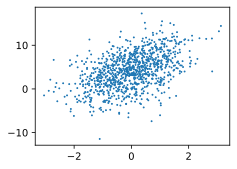

In [4]:
d2l.set_figsize()
print(features[:, 1].detach().numpy().shape)
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # print(indices)
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        # print(batch_indices)
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break

tensor([[-0.2636,  0.0601],
        [-0.7141, -0.4750],
        [ 0.3726, -0.6057],
        [-0.0762,  1.7295],
        [ 0.3662,  1.7606],
        [-1.1950, -0.0371],
        [ 0.5234, -0.4380],
        [ 2.0625,  0.7229],
        [ 1.2120,  0.4271],
        [-0.6799,  1.8322]]) tensor([[ 3.4509],
        [ 4.3905],
        [ 7.0133],
        [-1.8327],
        [-1.0503],
        [ 1.9457],
        [ 6.7290],
        [ 5.8593],
        [ 5.1744],
        [-3.4174]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    """"线性回归"""
    return torch.matmul(X,w)+b

def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

def sgd(params, lr, batch_size):
    """"随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.01
num_epochs = 4
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w,b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print(f"w的估计误差: {true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差: {true_b - b}")


    
    
    

epoch 1, loss 2.235473
epoch 2, loss 0.306430
epoch 3, loss 0.042572
epoch 4, loss 0.006027
w的估计误差: tensor([ 0.0549, -0.0488], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0825], grad_fn=<SubBackward0>)
